In [81]:
import pyforest

# Train Data

In [82]:
loan=pd.read_csv("project1_train.csv")
loan

<IPython.core.display.Javascript object>

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050     NaN     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate           NaN   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate           NaN   
30   LP001091    Male     Yes          1      Graduate           NaN   
31   LP001095    Male      No          0      Graduate            No   
32   LP001097    Male      No          1      Graduate           Yes   
33   LP001098    Male     Yes          0      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
35   LP001106    Male     Yes          0      Graduate            No   
36   LP001109    Male     Yes          0      Graduate            No   
37   LP001112  Female     Yes          0      Graduate            No   
38   LP001114    Male      No          0      Graduate            No   
39   LP001116    Male      No          0  Not Graduate            No   
40   LP001119    Male      No          0      Graduate            No   
41   LP001120    Male      No          0      Graduate            No   
42   LP001123    Male     Yes          0      Graduate            No   
43   LP001131    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate            No   
46   LP001138    Male     Yes          1      Graduate            No   
47   LP001144    Male     Yes          0      Graduate            No   
48   LP001146  Female     Yes          0      Graduate            No   
49   LP001151  Female      No          0      Graduate            No   
50   LP001155  Female     Yes          0  Not Graduate            No   
51   LP001157  Female      No          0      Graduate            No   
52   LP001164  Female      No          0      Graduate            No   
53   LP001179    Male     Yes          2      Graduate            No   
54   LP001186  Female     Yes          1      

# Exploratory data analysis

In [42]:
import pandas_profiling as pp
import sweetviz as sv
data=loan

In [43]:
EDA_report=pp.ProfileReport(loan)
EDA_report.to_file(output_file='report.html')
EDA_report

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
loan.isna().sum() #check for null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [85]:
loan['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [86]:
loan['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [87]:
loan['Credit_History'].unique()

array([ 1.,  0., nan])

In [88]:
loan['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [89]:
loan.drop(['Loan_ID'],inplace=True,axis=1) #Dropping this column as it is not necessary

In [90]:
loan

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
6      Male     Yes          0  Not Graduate            No             2333   
7      Male     Yes         3+      Graduate            No             3036   
8      Male     Yes          2      Graduate            No             4006   
9      Male     Yes          1      Graduate            No            12841   
10     Male     Yes          2      Graduate            No             3200   
11     Male     Yes          2      Graduate           NaN             2500   
12     Male     Yes          2      Graduate            No             3073   
13     Male      No          0      Graduate            No             1853   
14     Male     Yes          2      Graduate            No             1299   
15     Male      No          0      Graduate            No             4950   
16     Male      No          1  Not Graduate            No             3596   
17   Female      No          0      Graduate            No             3510   
18     Male     Yes          0  Not Graduate            No             4887   
19     Male     Yes          0      Graduate           NaN             2600   
20     Male     Yes          0  Not Graduate            No             7660   
21     Male     Yes          1      Graduate            No             5955   
22     Male     Yes          0  Not Graduate            No             2600   
23      NaN     Yes          2  Not Graduate            No             3365   
24     Male     Yes          1      Graduate           NaN             3717   
25     Male     Yes          0      Graduate           Yes             9560   
26     Male     Yes          0      Graduate            No             2799   
27     Male     Yes          2  Not Graduate            No             4226   
28     Male      No          0  Not Graduate            No             1442   
29   Female      No          2      Graduate           NaN             3750   
30     Male     Yes          1      Graduate           NaN             4166   
31     Male      No          0      Graduate            No             3167   
32     Male      No          1      Graduate           Yes             4692   
33     Male     Yes          0      Graduate            No             3500   
34     Male      No         3+      Graduate            No            12500   
35     Male     Yes          0      Graduate            No             2275   
36     Male     Yes          0      Graduate            No             1828   
37   Female     Yes          0      Graduate            No             3667   
38     Male      No          0      Graduate            No             4166   
39     Male      No          0  Not Graduate            No             3748   
40     Male      No          0      Graduate            No             3600   
41     Male      No          0      Graduate            No             1800   
42     Male     Yes          0      Graduate            No             2400   
43     Male     Yes          0      Graduate            No             3941   
44     Male     Yes          0  Not Graduate           Yes             4695   
45   Female      No          0      Graduate            No             3410   
46     Male     Yes          1      Graduate            No             5649   
47     Male     Yes          0      Graduate            No             5821   
48   Female     Yes          0      Graduate            No             2645   
49   Female      No          0      Graduate           

# Feature Engineering

## Label Encoding

In [91]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()


## Filling Null Values

In [92]:
mode=loan['Gender'].mode() #Filling null values of categorical values columns with mode & continuos values column with mean values of that column
loan['Gender']=loan['Gender'].fillna(mode.iloc[0])
loan.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [93]:
mode1=loan['Married'].mode()
loan['Married']=loan['Married'].fillna(mode1.iloc[0])
loan['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [94]:
mode2=loan['Self_Employed'].mode()
loan['Self_Employed']=loan['Self_Employed'].fillna(mode2.iloc[0])
loan['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [95]:
mean=loan['LoanAmount'].mean()
loan['LoanAmount']=loan['LoanAmount'].fillna(mean)


In [96]:
mode3=loan['Dependents'].mode()
loan['Dependents']=loan['Dependents'].fillna(mode3.iloc[0])
loan['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [97]:
mode4=loan['Credit_History'].mode()
loan['Credit_History']=loan['Credit_History'].fillna(mode4.iloc[0])

In [98]:
mode5=loan['Loan_Amount_Term'].mode()
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(mode5.iloc[0])

In [99]:
loan.isna().sum() #final review if there is any null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [100]:
loan['Loan_Status']=label_encoder.fit_transform(loan['Loan_Status'])
loan['Gender']=label_encoder.fit_transform(loan['Gender'])
loan['Married']=label_encoder.fit_transform(loan['Married'])
loan['Self_Employed']=label_encoder.fit_transform(loan['Self_Employed'])
loan['Education']=label_encoder.fit_transform(loan['Education'])
loan['Property_Area']=label_encoder.fit_transform(loan['Property_Area'])
loan

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          0              0             5849   
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
5         1        1          2          0              1             5417   
6         1        1          0          1              0             2333   
7         1        1         3+          0              0             3036   
8         1        1          2          0              0             4006   
9         1        1          1          0              0            12841   
10        1        1          2          0              0             3200   
11        1        1          2          0              0             2500   
12        1        1          2          0              0             3073   
13        1        0          0          0              0             1853   
14        1        1          2          0              0             1299   
15        1        0          0          0              0             4950   
16        1        0          1          1              0             3596   
17        0        0          0          0              0             3510   
18        1        1          0          1              0             4887   
19        1        1          0          0              0             2600   
20        1        1          0          1              0             7660   
21        1        1          1          0              0             5955   
22        1        1          0          1              0             2600   
23        1        1          2          1              0             3365   
24        1        1          1          0              0             3717   
25        1        1          0          0              1             9560   
26        1        1          0          0              0             2799   
27        1        1          2          1              0             4226   
28        1        0          0          1              0             1442   
29        0        0          2          0              0             3750   
30        1        1          1          0              0             4166   
31        1        0          0          0              0             3167   
32        1        0          1          0              1             4692   
33        1        1          0          0              0             3500   
34        1        0         3+          0              0            12500   
35        1        1          0          0              0             2275   
36        1        1          0          0              0             1828   
37        0        1          0          0              0             3667   
38        1        0          0          0              0             4166   
39        1        0          0          1              0             3748   
40        1        0          0          0              0             3600   
41        1        0          0          0              0             1800   
42        1        1          0          0              0             2400   
43        1        1          0          0              0             3941   
44        1        1          0          1              1             4695   
45        0        0          0          0              0             3410   
46        1        1          1          0              0             5649   
47        1        1          0          0              0             5821   
48        0        1          0          0              0             2645   
49        0        0          0          0              0             4000   
50        0        1       

In [101]:
loan['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [102]:
loan['Dependents'] = loan['Dependents'].astype(str)
loan['Dependents'] =loan['Dependents'].replace({'3+': '0'})
loan['Dependents'] = loan['Dependents'].astype(int)
loan

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
5         1        1           2          0              1             5417   
6         1        1           0          1              0             2333   
7         1        1           0          0              0             3036   
8         1        1           2          0              0             4006   
9         1        1           1          0              0            12841   
10        1        1           2          0              0             3200   
11        1        1           2          0              0             2500   
12        1        1           2          0              0             3073   
13        1        0           0          0              0             1853   
14        1        1           2          0              0             1299   
15        1        0           0          0              0             4950   
16        1        0           1          1              0             3596   
17        0        0           0          0              0             3510   
18        1        1           0          1              0             4887   
19        1        1           0          0              0             2600   
20        1        1           0          1              0             7660   
21        1        1           1          0              0             5955   
22        1        1           0          1              0             2600   
23        1        1           2          1              0             3365   
24        1        1           1          0              0             3717   
25        1        1           0          0              1             9560   
26        1        1           0          0              0             2799   
27        1        1           2          1              0             4226   
28        1        0           0          1              0             1442   
29        0        0           2          0              0             3750   
30        1        1           1          0              0             4166   
31        1        0           0          0              0             3167   
32        1        0           1          0              1             4692   
33        1        1           0          0              0             3500   
34        1        0           0          0              0            12500   
35        1        1           0          0              0             2275   
36        1        1           0          0              0             1828   
37        0        1           0          0              0             3667   
38        1        0           0          0              0             4166   
39        1        0           0          1              0             3748   
40        1        0           0          0              0             3600   
41        1        0           0          0              0             1800   
42        1        1           0          0              0             2400   
43        1        1           0          0              0             3941   
44        1        1           0          1              1             4695   
45        0        0           0          0              0             3410   
46        1        1           1          0              0             5649   
47        1        1           0          0              0             5821   
48        0        1           0          0              0             2645   
49        0        0           0          0            

In [103]:
loan['Dependents'].value_counts()

0    411
1    102
2    101
Name: Dependents, dtype: int64

In [104]:
loan.describe()

Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.495114    0.218241       0.133550   
std      0.386497    0.476373    0.761519    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    2.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  Property_Area  Loan_Status  
count      614.000000     614.000000   614.000000  
mean         0.855049       1.037459     0.687296  
std          0.352339       0.787482     0.463973  
min          0.000000       0.000000     0.000000  
25%          1.000000       0.000000     0.000000  
50%          1.000000       1.000000     1.000000  
75%          1.000000       2.000000     1.000000  
max          1.000000       2.000000     1.000000

In [105]:
loan.kurt()

Gender                0.720863
Married              -1.589356
Dependents           -0.323800
Education            -0.130044
Self_Employed         2.673417
ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.896456
Loan_Amount_Term      6.924993
Credit_History        2.095179
Property_Area        -1.383653
Loan_Status          -1.348306
dtype: float64

In [106]:
loan.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.139474
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

## Detecting outliers and treating them

In [107]:
median=loan.iloc[:,5:9].median() #considering only continuous independent variables
std=loan.iloc[:,5:9].std()
outliers=(loan.iloc[:,5:9]-median).abs()>std
loan[outliers]=np.nan  #outliers are replaced with nan

In [108]:
loan

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0           5849.0   
1         1        1           1          0              0           4583.0   
2         1        1           0          0              1           3000.0   
3         1        1           0          1              0           2583.0   
4         1        0           0          0              0           6000.0   
5         1        1           2          0              1           5417.0   
6         1        1           0          1              0           2333.0   
7         1        1           0          0              0           3036.0   
8         1        1           2          0              0           4006.0   
9         1        1           1          0              0              NaN   
10        1        1           2          0              0           3200.0   
11        1        1           2          0              0           2500.0   
12        1        1           2          0              0           3073.0   
13        1        0           0          0              0           1853.0   
14        1        1           2          0              0           1299.0   
15        1        0           0          0              0           4950.0   
16        1        0           1          1              0           3596.0   
17        0        0           0          0              0           3510.0   
18        1        1           0          1              0           4887.0   
19        1        1           0          0              0           2600.0   
20        1        1           0          1              0           7660.0   
21        1        1           1          0              0           5955.0   
22        1        1           0          1              0           2600.0   
23        1        1           2          1              0           3365.0   
24        1        1           1          0              0           3717.0   
25        1        1           0          0              1           9560.0   
26        1        1           0          0              0           2799.0   
27        1        1           2          1              0           4226.0   
28        1        0           0          1              0           1442.0   
29        0        0           2          0              0           3750.0   
30        1        1           1          0              0           4166.0   
31        1        0           0          0              0           3167.0   
32        1        0           1          0              1           4692.0   
33        1        1           0          0              0           3500.0   
34        1        0           0          0              0              NaN   
35        1        1           0          0              0           2275.0   
36        1        1           0          0              0           1828.0   
37        0        1           0          0              0           3667.0   
38        1        0           0          0              0           4166.0   
39        1        0           0          1              0           3748.0   
40        1        0           0          0              0           3600.0   
41        1        0           0          0              0           1800.0   
42        1        1           0          0              0           2400.0   
43        1        1           0          0              0           3941.0   
44        1        1           0          1              1           4695.0   
45        0        0           0          0              0           3410.0   
46        1        1           1          0              0           5649.0   
47        1        1           0          0              0           5821.0   
48        0        1           0          0              0           2645.0   
49        0        0           0          0            

In [109]:
loan.fillna(mean,inplace=True) # now nan values are replaced with mean values of that column
loan

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0      5849.000000   
1         1        1           1          0              0      4583.000000   
2         1        1           0          0              1      3000.000000   
3         1        1           0          1              0      2583.000000   
4         1        0           0          0              0      6000.000000   
5         1        1           2          0              1      5417.000000   
6         1        1           0          1              0      2333.000000   
7         1        1           0          0              0      3036.000000   
8         1        1           2          0              0      4006.000000   
9         1        1           1          0              0       146.412162   
10        1        1           2          0              0      3200.000000   
11        1        1           2          0              0      2500.000000   
12        1        1           2          0              0      3073.000000   
13        1        0           0          0              0      1853.000000   
14        1        1           2          0              0      1299.000000   
15        1        0           0          0              0      4950.000000   
16        1        0           1          1              0      3596.000000   
17        0        0           0          0              0      3510.000000   
18        1        1           0          1              0      4887.000000   
19        1        1           0          0              0      2600.000000   
20        1        1           0          1              0      7660.000000   
21        1        1           1          0              0      5955.000000   
22        1        1           0          1              0      2600.000000   
23        1        1           2          1              0      3365.000000   
24        1        1           1          0              0      3717.000000   
25        1        1           0          0              1      9560.000000   
26        1        1           0          0              0      2799.000000   
27        1        1           2          1              0      4226.000000   
28        1        0           0          1              0      1442.000000   
29        0        0           2          0              0      3750.000000   
30        1        1           1          0              0      4166.000000   
31        1        0           0          0              0      3167.000000   
32        1        0           1          0              1      4692.000000   
33        1        1           0          0              0      3500.000000   
34        1        0           0          0              0       146.412162   
35        1        1           0          0              0      2275.000000   
36        1        1           0          0              0      1828.000000   
37        0        1           0          0              0      3667.000000   
38        1        0           0          0              0      4166.000000   
39        1        0           0          1              0      3748.000000   
40        1        0           0          0              0      3600.000000   
41        1        0           0          0              0      1800.000000   
42        1        1           0          0              0      2400.000000   
43        1        1           0          0              0      3941.000000   
44        1        1           0          1              1      4695.000000   
45        0        0           0          0              0      3410.000000   
46        1        1           1          0              0      5649.000000   
47        1        1           0          0              0      5821.000000   
48        0        1           0          0              0      2645.000000   
49        0        0           0          0            

## Transformations to treat skewness

In [110]:
loan1=loan

In [111]:
loan.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.139474
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.528810
CoapplicantIncome    0.766014
LoanAmount          -0.116158
Loan_Amount_Term    -2.256466
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [112]:
from scipy import stats             #boxcox transformation 
loan1['ApplicantIncome']=stats.boxcox(loan1['ApplicantIncome'])[0]
pd.Series(loan1['ApplicantIncome']).skew()

<IPython.core.display.Javascript object>

-0.11594168760775121

In [113]:
loan1['CoapplicantIncome']=np.sqrt(loan1['CoapplicantIncome'])   #square root transformation
loan1['CoapplicantIncome'].skew()

0.291386874331451

In [114]:
loan1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.139474
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.115942
CoapplicantIncome    0.291387
LoanAmount          -0.116158
Loan_Amount_Term    -2.256466
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [115]:
pd.set_option('display.max_rows', 614)
loan1

<IPython.core.display.Javascript object>

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0       681.118757   
1         1        1           1          0              0       572.111635   
2         1        1           0          0              1       422.491806   
3         1        1           0          1              0       379.565640   
4         1        0           0          0              0       693.643089   
5         1        1           2          0              1       644.762752   
6         1        1           0          1              0       352.879729   
7         1        1           0          0              0       426.114486   
8         1        1           2          0              0       519.616581   
9         1        1           1          0              0        47.756465   
10        1        1           2          0              0       442.465005   
11        1        1           2          0              0       370.791589   
12        1        1           2          0              0       429.824991   
13        1        0           0          0              0       299.192036   
14        1        1           2          0              0       231.904207   
15        1        0           0          0              0       604.511896   
16        1        0           1          1              0       480.990797   
17        0        0           0          0              0       472.732012   
18        1        1           0          1              0       599.000301   
19        1        1           0          0              0       381.352700   
20        1        1           0          1              0       825.947641   
21        1        1           1          0              0       689.920221   
22        1        1           0          1              0       381.352700   
23        1        1           2          1              0       458.674547   
24        1        1           1          0              0       492.515573   
25        1        1           0          0              1       967.632652   
26        1        1           0          0              0       402.030171   
27        1        1           2          1              0       539.872303   
28        1        0           0          1              0       249.950661   
29        0        0           2          0              0       495.639928   
30        1        1           1          0              0       534.378632   
31        1        0           0          0              0       439.194640   
32        1        0           1          0              1       581.809766   
33        1        1           0          0              0       471.767946   
34        1        0           0          0              0        47.756465   
35        1        1           0          0              0       346.573665   
36        1        1           0          0              0       296.293199   
37        0        1           0          0              0       487.766504   
38        1        0           0          0              0       534.378632   
39        1        0           0          1              0       495.450798   
40        1        0           0          0              0       481.373540   
41        1        0           0          0              0       293.032975   
42        1        1           0          0              0       360.108673   
43        1        1           0          0              0       513.571437   
44        1        1           0          1              1       582.075768   
45        0        0           0          0              0       463.055460   
46        1        1           1          0              0       664.386516   
47        1        1           0          0              0       678.786233   
48        0        1           0          0              0       386.067079   
49        0        0           0          0            

In [116]:
loan1.Gender.value_counts()

1    502
0    112
Name: Gender, dtype: int64

# Univariate Feature selection 

In [117]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data

array = loan1.values
X = array[:,0:12]
Y = array[:,11]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


[3.623e-02 1.782e+00 1.257e+00 3.541e+00 7.285e-03 9.816e+01 4.944e+01
 1.465e-01 2.404e+01 2.601e+01 3.778e-01 1.920e+02]


## Feature Selection Visualisation

In [118]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<IPython.core.display.Javascript object>

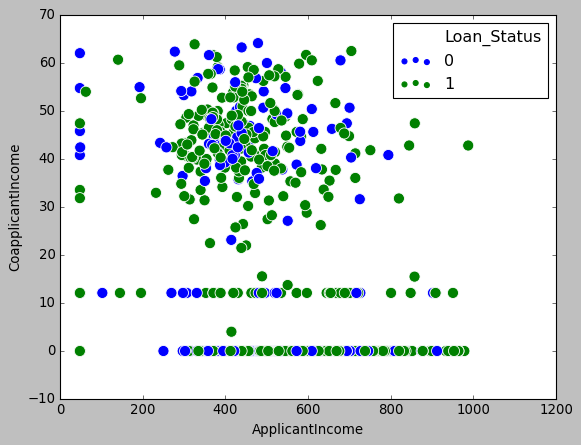

In [119]:
sns.scatterplot(data=loan1,x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status',s=100) #example 1

<IPython.core.display.Javascript object>

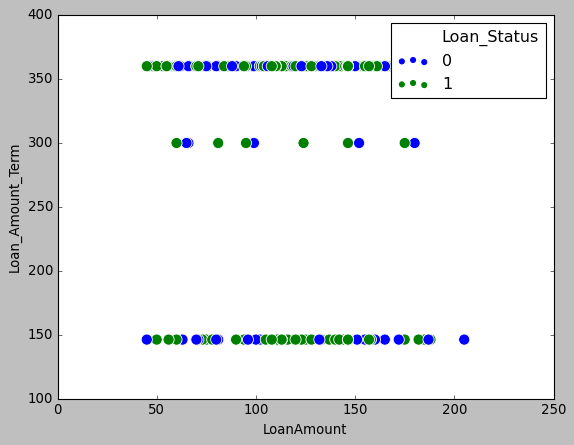

In [120]:
sns.scatterplot(data=loan1,x='LoanAmount',y='Loan_Amount_Term',hue='Loan_Status',s=100) #example 1

# Resampling Dependent Variable

In [121]:
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique to solve imbalance dependent variable
smote = SMOTE()

In [122]:
X = loan1.iloc[:,0:12]
Y = loan1.iloc[:,11]

In [123]:
X_smote,Y_smote = smote.fit_resample(X,Y.astype('int'))

In [124]:
from collections import Counter
Counter(Y_smote)

Counter({1: 422, 0: 422})

# Univariate and Bivariate visualisation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

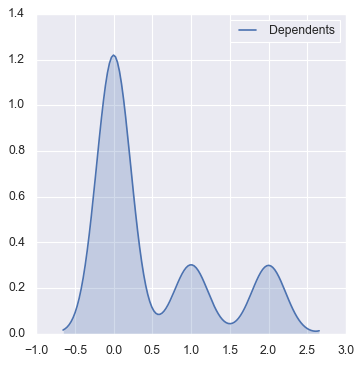

In [125]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan1['Dependents'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

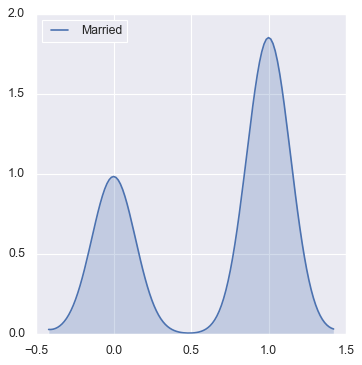

In [126]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan1['Married'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

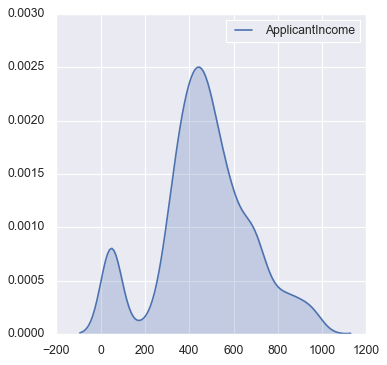

In [130]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan1['ApplicantIncome'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

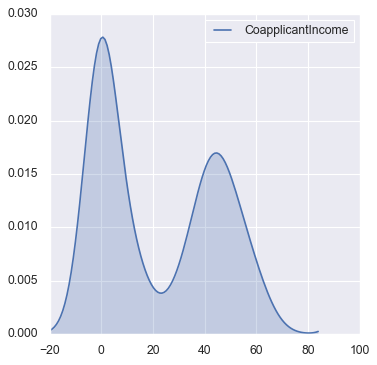

In [131]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan1['CoapplicantIncome'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

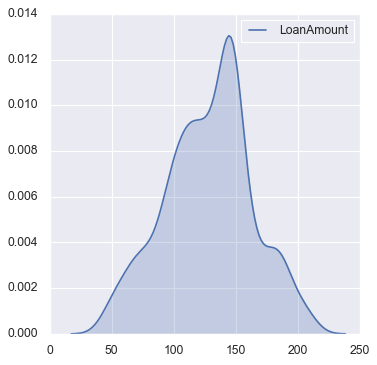

In [132]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan1['LoanAmount'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

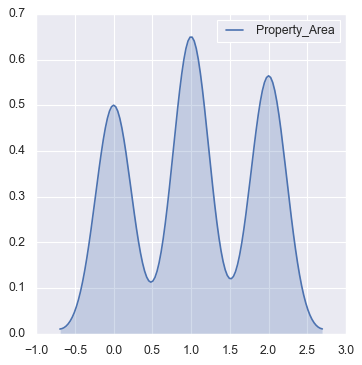

In [135]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan1['Property_Area'],shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

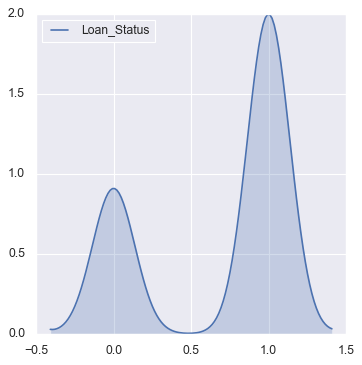

In [136]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(loan1['Loan_Status'],shade=True)

<IPython.core.display.Javascript object>

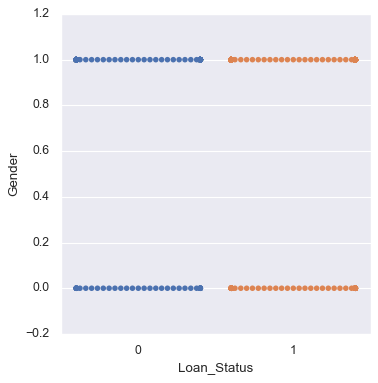

In [137]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['Gender'])

<IPython.core.display.Javascript object>

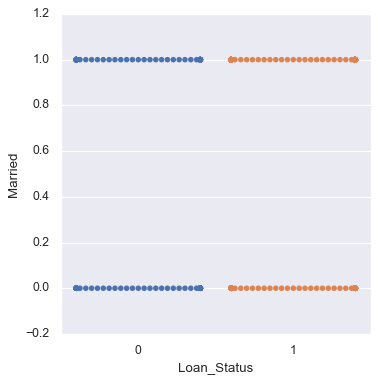

In [138]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['Married'])

<IPython.core.display.Javascript object>

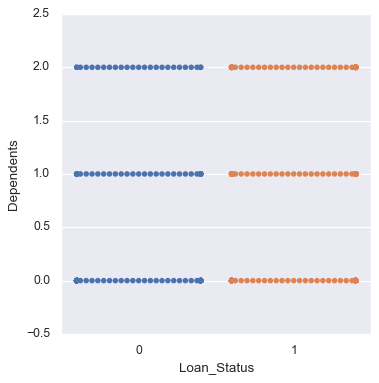

In [139]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['Dependents'])

<IPython.core.display.Javascript object>

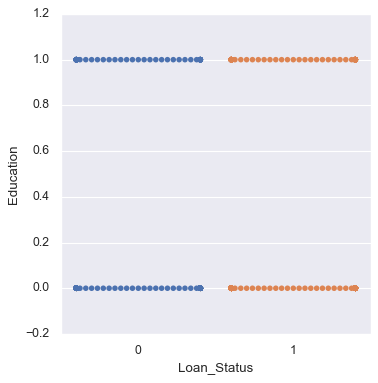

In [140]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['Education'])

<IPython.core.display.Javascript object>

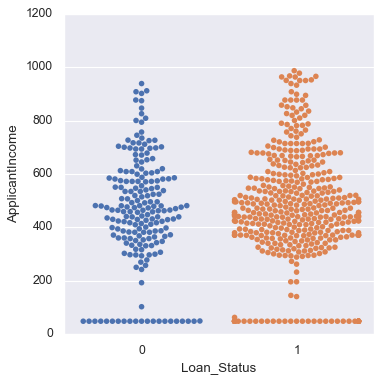

In [141]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['ApplicantIncome'])

<IPython.core.display.Javascript object>

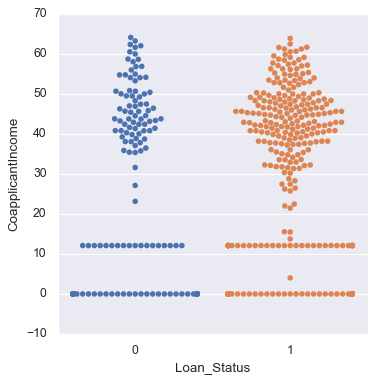

In [142]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['CoapplicantIncome'])

<IPython.core.display.Javascript object>

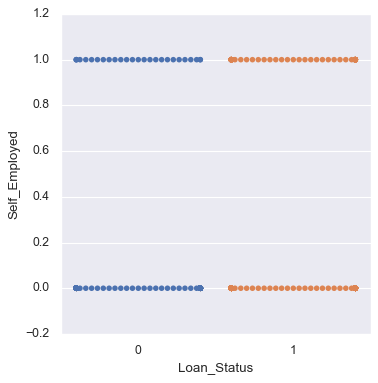

In [143]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['Self_Employed'])

<IPython.core.display.Javascript object>

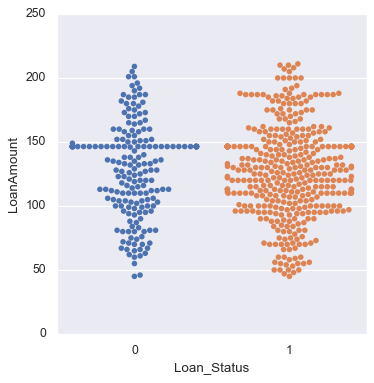

In [144]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['LoanAmount'])

<IPython.core.display.Javascript object>

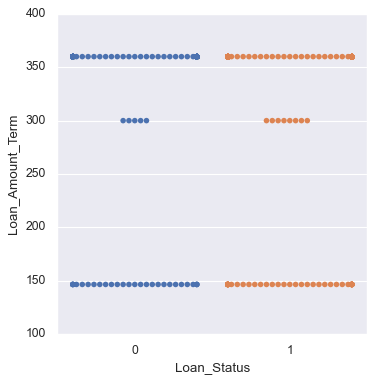

In [145]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['Loan_Amount_Term'])

<IPython.core.display.Javascript object>

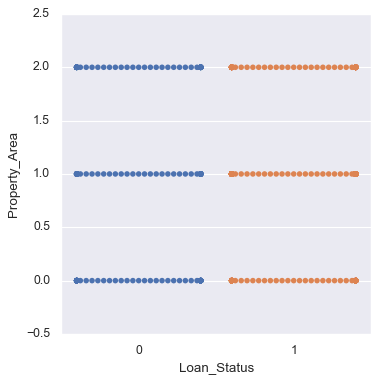

In [146]:
sns.swarmplot(x=loan1['Loan_Status'],y=loan1['Property_Area'])

# Test Data

In [147]:
test = pd.read_excel('test.xlsx')
test

<IPython.core.display.Javascript object>

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001015    Male     Yes          0      Graduate            No   
1    LP001022    Male     Yes          1      Graduate            No   
2    LP001031    Male     Yes          2      Graduate            No   
3    LP001035    Male     Yes          2      Graduate            No   
4    LP001051    Male      No          0  Not Graduate            No   
5    LP001054    Male     Yes          0  Not Graduate           Yes   
6    LP001055  Female      No          1  Not Graduate            No   
7    LP001056    Male     Yes          2  Not Graduate            No   
8    LP001059    Male     Yes          2      Graduate           NaN   
9    LP001067    Male      No          0  Not Graduate            No   
10   LP001078    Male      No          0  Not Graduate            No   
11   LP001082    Male     Yes          1      Graduate           NaN   
12   LP001083    Male      No         3+      Graduate            No   
13   LP001094    Male     Yes          2      Graduate           NaN   
14   LP001096  Female      No          0      Graduate            No   
15   LP001099    Male      No          1      Graduate            No   
16   LP001105    Male     Yes          2      Graduate            No   
17   LP001107    Male     Yes         3+      Graduate            No   
18   LP001108    Male     Yes          0      Graduate            No   
19   LP001115    Male      No          0      Graduate            No   
20   LP001121    Male     Yes          1  Not Graduate            No   
21   LP001124  Female      No         3+  Not Graduate            No   
22   LP001128     NaN      No          0      Graduate            No   
23   LP001135  Female      No          0  Not Graduate            No   
24   LP001149    Male     Yes          0      Graduate            No   
25   LP001153    Male      No          0      Graduate            No   
26   LP001163    Male     Yes          2      Graduate            No   
27   LP001169    Male     Yes          0      Graduate            No   
28   LP001174    Male     Yes          0      Graduate            No   
29   LP001176    Male      No          0      Graduate            No   
30   LP001177  Female      No          0  Not Graduate            No   
31   LP001183    Male     Yes          2      Graduate            No   
32   LP001185    Male      No          0      Graduate            No   
33   LP001187    Male     Yes          0      Graduate            No   
34   LP001190    Male     Yes          0      Graduate            No   
35   LP001203    Male      No          0      Graduate            No   
36   LP001208    Male     Yes          2      Graduate           NaN   
37   LP001210    Male     Yes          0      Graduate           Yes   
38   LP001211    Male      No          0      Graduate           Yes   
39   LP001219    Male      No          0      Graduate            No   
40   LP001220    Male     Yes          0      Graduate            No   
41   LP001221  Female      No          0      Graduate            No   
42   LP001226    Male     Yes          0  Not Graduate            No   
43   LP001230    Male      No          0      Graduate            No   
44   LP001231  Female      No          0      Graduate            No   
45   LP001232    Male     Yes          0      Graduate            No   
46   LP001237    Male     Yes        NaN  Not Graduate            No   
47   LP001242    Male      No          0  Not Graduate            No   
48   LP001268    Male      No          0      Graduate            No   
49   LP001270    Male     Yes         3+  Not Graduate           Yes   
50   LP001284    Male     Yes          1      Graduate            No   
51   LP001287     NaN     Yes         3+  Not Graduate            No   
52   LP001291    Male     Yes          1      Graduate            No   
53   LP001298    Male     Yes          2      Graduate            No   
54   LP001312    Male     Yes          0  Not 

In [148]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## EDA

In [149]:
data=test
EDA_report=pp.ProfileReport(test)
EDA_report.to_file(output_file='report.html')
EDA_report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [150]:
test.drop(['Loan_ID'],inplace=True,axis=1)

## Feature engineering

### Filling Null Values

In [151]:
modet=test['Gender'].mode() #Filling null values of categorical values columns with mode & continuos values column with mean values of that column
test['Gender']=test['Gender'].fillna(modet.iloc[0])

In [152]:
modet1=test['Married'].mode()
test['Married']=test['Married'].fillna(modet1.iloc[0])

In [153]:
modet2=test['Self_Employed'].mode()
test['Self_Employed']=test['Self_Employed'].fillna(modet2.iloc[0])

In [154]:
meant=test['LoanAmount'].mean()
test['LoanAmount']=test['LoanAmount'].fillna(meant)

In [155]:
modet3=test['Dependents'].mode()
test['Dependents']=test['Dependents'].fillna(modet3.iloc[0])

In [156]:
modet4=test['Credit_History'].mode()
test['Credit_History']=test['Credit_History'].fillna(modet4.iloc[0])

In [157]:
modet5=test['Loan_Amount_Term'].mode()
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(modet5.iloc[0])

### Label Encoding

In [158]:
test['Gender']=label_encoder.fit_transform(test['Gender'])
test['Married']=label_encoder.fit_transform(test['Married'])
test['Self_Employed']=label_encoder.fit_transform(test['Self_Employed'])
test['Education']=label_encoder.fit_transform(test['Education'])
test['Property_Area']=label_encoder.fit_transform(test['Property_Area'])

In [159]:
test['Dependents'] =test['Dependents'].replace({'3+': '0'})
test['Dependents'] = test['Dependents'].astype(int)

In [160]:
test

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           0          0              0             5720   
1         1        1           1          0              0             3076   
2         1        1           2          0              0             5000   
3         1        1           2          0              0             2340   
4         1        0           0          1              0             3276   
5         1        1           0          1              1             2165   
6         0        0           1          1              0             2226   
7         1        1           2          1              0             3881   
8         1        1           2          0              0            13633   
9         1        0           0          1              0             2400   
10        1        0           0          1              0             3091   
11        1        1           1          0              0             2185   
12        1        0           0          0              0             4166   
13        1        1           2          0              0            12173   
14        0        0           0          0              0             4666   
15        1        0           1          0              0             5667   
16        1        1           2          0              0             4583   
17        1        1           0          0              0             3786   
18        1        1           0          0              0             9226   
19        1        0           0          0              0             1300   
20        1        1           1          1              0             1888   
21        0        0           0          1              0             2083   
22        1        0           0          0              0             3909   
23        0        0           0          1              0             3765   
24        1        1           0          0              0             5400   
25        1        0           0          0              0                0   
26        1        1           2          0              0             4363   
27        1        1           0          0              0             7500   
28        1        1           0          0              0             3772   
29        1        0           0          0              0             2942   
30        0        0           0          1              0             2478   
31        1        1           2          0              0             6250   
32        1        0           0          0              0             3268   
33        1        1           0          0              0             2783   
34        1        1           0          0              0             2740   
35        1        0           0          0              0             3150   
36        1        1           2          0              0             7350   
37        1        1           0          0              1             2267   
38        1        0           0          0              1             5833   
39        1        0           0          0              0             3643   
40        1        1           0          0              0             5629   
41        0        0           0          0              0             3644   
42        1        1           0          1              0             1750   
43        1        0           0          0              0             6500   
44        0        0           0          0              0             3666   
45        1        1           0          0              0             4260   
46        1        1           0          1              0             4163   
47        1        0           0          1              0             2356   
48        1        0           0          0              0             6792   
49        1        1           0          1            

# Model Building

In [161]:
import warnings
warnings.filterwarnings("ignore")

## Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X1=X_smote.iloc[:,0:10] #considering 1st 9 columns based on feature importance
Y1=Y_smote
classifier = LogisticRegression()
classifier.fit(X1,Y1)

LogisticRegression()

In [163]:
classifier.coef_

array([[-2.586e-01,  6.010e-01,  4.111e-01, -4.661e-01,  7.427e-01,
         3.353e-04,  9.275e-03, -1.058e-02, -2.771e-03,  3.683e+00]])

In [164]:
classifier.predict_proba (X1)

array([[0.56 , 0.44 ],
       [0.216, 0.784],
       [0.134, 0.866],
       ...,
       [0.352, 0.648],
       [0.869, 0.131],
       [0.984, 0.016]])

In [165]:
yl_pred = classifier.predict(X1)
X_smote["y_pred"] = yl_pred
X_smote

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0       681.118757   
1         1        1           1          0              0       572.111635   
2         1        1           0          0              1       422.491806   
3         1        1           0          1              0       379.565640   
4         1        0           0          0              0       693.643089   
..      ...      ...         ...        ...            ...              ...   
839       1        1           0          0              0       474.508804   
840       0        1           0          1              0       337.565286   
841       1        1           0          0              0       672.281276   
842       1        0           1          0              0       411.508144   
843       1        0           0          0              0       717.616627   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             0.000000  146.412162        360.000000        1.000000   
1            38.832976  128.000000        360.000000        1.000000   
2             0.000000   66.000000        360.000000        1.000000   
3            48.559242  120.000000        360.000000        1.000000   
4             0.000000  141.000000        360.000000        1.000000   
..                 ...         ...               ...             ...   
839           1.102373   85.646331        146.412162        0.908895   
840          55.637869  178.438740        360.000000        0.000000   
841          46.751878  163.337519        360.000000        1.000000   
842           0.000000   45.379942        146.412162        0.014613   
843          13.877911  206.996583        360.000000        0.091064   

     Property_Area  Loan_Status  y_pred  
0                2            1       0  
1                0            0       1  
2                2            1       1  
3                2            1       1  
4                2            1       0  
..             ...          ...     ...  
839              0            0       1  
840              1            0       0  
841              0            0       1  
842              2            0       0  
843              0            0       0  

[844 rows x 13 columns]

In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y1,yl_pred)
print (confusion_matrix)

[[266 156]
 [ 44 378]]


In [167]:
from sklearn.metrics import f1_score
f1_score(Y1,yl_pred)

0.7907949790794979

In [168]:
pd.crosstab(yl_pred,Y1)

<IPython.core.display.Javascript object>

Loan_Status    0    1
row_0                
0            266   44
1            156  378

In [169]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y1,classifier.predict(X1))
Logit_roc_score 

0.7630331753554502

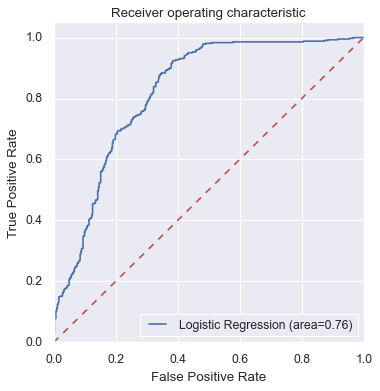

In [170]:
fpr, tpr, thresholds = roc_curve(Y1,classifier.predict_proba(X1)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [171]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X1)[:,:]) 
y_prob1

<IPython.core.display.Javascript object>

0         1
0    0.559903  0.440097
1    0.215898  0.784102
2    0.133916  0.866084
3    0.372198  0.627802
4    0.544712  0.455288
..        ...       ...
839  0.231442  0.768558
840  0.969764  0.030236
841  0.351626  0.648374
842  0.868610  0.131390
843  0.983506  0.016494

[844 rows x 2 columns]

In [172]:
import statsmodels.api as sm
logit = sm.Logit(Y1, X1)
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.508553
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  844
Model:                          Logit   Df Residuals:                      834
Method:                           MLE   Df Model:                            9
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.2663
Time:                        19:45:49   Log-Likelihood:                -429.22
converged:                       True   LL-Null:                       -585.02
Covariance Type:            nonrobust   LLR p-value:                 9.042e-62
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.0465      0.215     -0.216      0.829      -0.468       0.375
Married               0.7696      0.196      3.924      0.000       0.385       1.154
Dependents            0.2876      0.131      2.194      0.028       0.031       0.545
Education            -0.3919      0.215     -1.826      0.068      -0.813       0.029
Self_Employed         0.7575      0.302      2.511      0.012       0.166       1.349
ApplicantIncome    7.806e-05      0.000      0.188      0.851      -0.001       0.001
CoapplicantIncome     0.0073      0.004      1.772      0.076      -0.001       0.015
LoanAmount           -0.0144      0.002     -5.776      0.000      -0.019      -0.009
Loan_Amount_Term     -0.0052      0.001     -5.266      0.000      -0.007      -0.003
Credit_History        3.6087      0.300     12.012      0.000       3.020       4.197
=====================================================================================
"""

In [173]:
fpr

array([0.   , 0.   , 0.   , 0.002, 0.002, 0.007, 0.007, 0.009, 0.009,
       0.012, 0.012, 0.014, 0.014, 0.017, 0.017, 0.021, 0.021, 0.028,
       0.028, 0.031, 0.031, 0.033, 0.033, 0.036, 0.036, 0.038, 0.038,
       0.043, 0.043, 0.045, 0.045, 0.05 , 0.05 , 0.052, 0.052, 0.055,
       0.055, 0.057, 0.057, 0.062, 0.062, 0.064, 0.064, 0.066, 0.066,
       0.069, 0.069, 0.071, 0.071, 0.073, 0.073, 0.076, 0.076, 0.078,
       0.078, 0.081, 0.081, 0.085, 0.085, 0.088, 0.088, 0.09 , 0.09 ,
       0.095, 0.095, 0.1  , 0.1  , 0.102, 0.102, 0.104, 0.104, 0.107,
       0.107, 0.109, 0.109, 0.114, 0.114, 0.116, 0.116, 0.118, 0.118,
       0.121, 0.121, 0.123, 0.123, 0.126, 0.126, 0.126, 0.126, 0.133,
       0.133, 0.135, 0.135, 0.14 , 0.14 , 0.142, 0.142, 0.145, 0.145,
       0.147, 0.147, 0.152, 0.152, 0.154, 0.154, 0.156, 0.156, 0.159,
       0.159, 0.161, 0.161, 0.164, 0.164, 0.166, 0.166, 0.168, 0.168,
       0.171, 0.171, 0.173, 0.173, 0.175, 0.175, 0.178, 0.178, 0.182,
       0.182, 0.185,

In [174]:
tpr

array([0.   , 0.002, 0.028, 0.028, 0.078, 0.078, 0.102, 0.102, 0.111,
       0.111, 0.123, 0.123, 0.13 , 0.13 , 0.149, 0.149, 0.152, 0.152,
       0.161, 0.161, 0.166, 0.166, 0.173, 0.173, 0.175, 0.175, 0.178,
       0.178, 0.182, 0.182, 0.187, 0.187, 0.206, 0.206, 0.211, 0.211,
       0.213, 0.213, 0.223, 0.223, 0.227, 0.227, 0.232, 0.232, 0.242,
       0.242, 0.246, 0.246, 0.249, 0.249, 0.251, 0.251, 0.258, 0.258,
       0.261, 0.261, 0.268, 0.268, 0.289, 0.289, 0.299, 0.299, 0.308,
       0.308, 0.348, 0.348, 0.363, 0.363, 0.37 , 0.37 , 0.372, 0.372,
       0.379, 0.379, 0.384, 0.384, 0.403, 0.403, 0.405, 0.405, 0.408,
       0.408, 0.41 , 0.41 , 0.419, 0.419, 0.427, 0.431, 0.455, 0.455,
       0.457, 0.457, 0.467, 0.467, 0.469, 0.469, 0.498, 0.498, 0.509,
       0.509, 0.524, 0.524, 0.559, 0.559, 0.562, 0.562, 0.564, 0.564,
       0.571, 0.571, 0.576, 0.576, 0.583, 0.583, 0.588, 0.588, 0.597,
       0.597, 0.607, 0.607, 0.611, 0.611, 0.616, 0.616, 0.621, 0.621,
       0.626, 0.626,

### Predicting on test data

In [175]:
y_test1 = pd.DataFrame(classifier.predict(test.iloc[:,0:10]))  #logistic model
y_test1

<IPython.core.display.Javascript object>

0
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
10   1
11   1
12   1
13   1
14   1
15   1
16   1
17   1
18   1
19   1
20   1
21   1
22   1
23   1
24   1
25   1
26   1
27   1
28   1
29   1
30   1
31   1
32   1
33   1
34   1
35   0
36   1
37   1
38   1
39   1
40   1
41   1
42   1
43   1
44   1
45   1
46   1
47   1
48   1
49   1
50   1
51   1
52   1
53   1
54   1
55   0
56   1
57   1
58   1
59   1
60   1
61   1
62   1
63   1
64   1
65   1
66   0
67   0
68   1
69   1
70   1
71   1
72   1
73   1
74   1
75   1
76   1
77   1
78   1
79   1
80   1
81   1
82   0
83   1
84   0
85   1
86   1
87   1
88   1
89   1
90   1
91   1
92   1
93   1
94   1
95   1
96   1
97   1
98   1
99   1
100  1
101  0
102  1
103  1
104  1
105  1
106  1
107  1
108  1
109  1
110  1
111  1
112  1
113  1
114  1
115  1
116  1
117  1
118  1
119  1
120  1
121  1
122  1
123  1
124  0
125  1
126  0
127  1
128  1
129  1
130  1
131  1
132  1
133  1
134  1
135  1
136  1
137  1
138  1
139  1
140  0
141  1
142  1
143  1
144  1
145  1
146  1
147  0
148  1
149  1
150  1
151  1
152  1
153  1
154  1
155  1
156  1
157  1
158  1
159  1
160  1
161  0
162  1
163  1
164  1
165  0
166  1
167  1
168  1
169  1
170  1
171  1
172  1
173  1
174  1
175  1
176  1
177  1
178  1
179  1
180  1
181  1
182  1
183  1
184  1
185  1
186  1
187  1
188  1
189  1
190  1
191  1
192  1
193  1
194  1
195  1
196  0
197  1
198  1
199  1
200  1
201  1
202  1
203  1
204  1
205  1
206  1
207  1
208  1
209  1
210  1
211  1
212  1
213  1
214  1
215  1
216  1
217  1
218  1
219  1
220  1
221  1
222  1
223  1
224  0
225  1
226  1
227  1
228  1
229  0
230  1
231  1
232  1
233  1
234  1
235  1
236  1
237  1
238  1
239  1
240  1
241  1
242  1
243  1
244  1
245  1
246  1
247  1
248  1
249  1
250  1
251  1
252  1
253  1
254  1
255  0
256  1
257  1
258  1
259  1
260  1
261  1
262  1
263  1
264  1
265  1
266  1
267  1
268  1
269  1
270  1
271  1
272  1
273  1
274  0
275  1
276  1
277  1
278  1
279  1
280  1
281  1
282  1
283  1
284  1
285  1
286  1
287  1
288  1
289  1
290  1
291  1
292  1
293  1
294  1
295  1
296  1
297  1
298  1
299  1
300  1
301  0
302  1
303  1
304  1
305  1
306  1
307  1
308  1
309  1
310  1
311  1
312  1
313  1
314  1
315  1
316  1
317  1
318  1
319  1
320  1
321  1
322  1
323  1
324  1
325  1
326  1
327  1
328  1
329  1
330  1
331  1
332  1
333  1
334  1
335  1
336  1
337  1
338  1
339  1
340  1
341  1
342  1
343  1
344  1
345  1
346  1
347  1
348  1
349  1
350  1
351  1
352  1
353  1
354  0
355  1
356  1
357  1
358  1
359  1
360  1
361  1
362  1
363  1
364  1
365  1
366  1

In [176]:
array = Y1.values
XT = array[0:367]

In [177]:
f1_score(y_test1,XT)

0.7913188647746244

## XGBM

In [199]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [200]:
array1 = X_smote.values
X2 = array1[:,0:10]
Y2 = Y_smote 

In [201]:
seed = 40
test_size = 0.4
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=test_size, random_state=seed)

<IPython.core.display.Javascript object>

In [202]:
model1 = XGBClassifier()
model1.fit(X2_train, y2_train)

[19:50:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
yx_pred = model1.predict(X2_test)
predictionsx = [round(value) for value in yx_pred] 

In [204]:
accuracy = accuracy_score(y2_test, predictionsx)
accuracy

0.8047337278106509

In [205]:
predictionsx

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


### Predicting on test data

In [206]:
Test = test.rename(columns={'Gender': "f0", 'Married': "f1", 'Dependents': "f2",'Education':'f3','Self_Employed':'f4','ApplicantIncome':'f5','CoapplicantIncome':'f6','LoanAmount':'f7','Loan_Amount_Term':'f8','Credit_History':'f9'})

In [207]:
yx_pred = model1.predict(Test.iloc[:,0:10])

In [208]:
yx_pred   #XGBM model

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [209]:
accuracyl = accuracy_score(XT, yx_pred)
accuracyl

0.6457765667574932

## LGBM

In [210]:
from sklearn.metrics import accuracy_score
array2 = X_smote.values
X3 = X_smote.iloc[:,0:10]
Y3 = Y_smote

In [211]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size = 0.4, random_state = 40)

<IPython.core.display.Javascript object>

In [212]:
import lightgbm as lgb
d_train = lgb.Dataset(x3_train, label=y3_train)

In [213]:
params = {}
params['learning_rate'] = 0.001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 20
params['min_data'] = 70
params['max_depth'] = 2

In [214]:
clf = lgb.train(params, d_train,num_boost_round=400, verbose_eval=10) 

[LightGBM] [Info] Number of positive: 254, number of negative: 252
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501976 -> initscore=0.007905
[LightGBM] [Info] Start training from score 0.007905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [215]:
ylg_pred3=clf.predict(x3_test)
predictionsl3 = [round(value) for value in ylg_pred3]
predictionsl3

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [216]:
accuracylg = accuracy_score(y3_test, predictionsl3)
accuracylg

0.7928994082840237

### Predicting on test data

In [217]:
ylg_pred4 = clf.predict(test.iloc[:,0:10])
predictions = [round(value) for value in ylg_pred4]
ylg_pred4

array([0.572, 0.568, 0.559, 0.577, 0.526, 0.558, 0.525, 0.423, 0.554,
       0.532, 0.526, 0.559, 0.527, 0.424, 0.525, 0.527, 0.559, 0.568,
       0.558, 0.532, 0.576, 0.525, 0.527, 0.525, 0.558, 0.399, 0.559,
       0.558, 0.577, 0.532, 0.525, 0.559, 0.519, 0.558, 0.577, 0.408,
       0.559, 0.577, 0.527, 0.523, 0.577, 0.525, 0.576, 0.519, 0.525,
       0.558, 0.558, 0.532, 0.519, 0.558, 0.577, 0.576, 0.559, 0.577,
       0.571, 0.411, 0.525, 0.559, 0.425, 0.571, 0.576, 0.577, 0.513,
       0.413, 0.571, 0.559, 0.423, 0.424, 0.553, 0.425, 0.525, 0.527,
       0.559, 0.558, 0.558, 0.519, 0.558, 0.527, 0.559, 0.551, 0.425,
       0.553, 0.423, 0.553, 0.424, 0.577, 0.559, 0.527, 0.532, 0.512,
       0.568, 0.553, 0.559, 0.576, 0.435, 0.569, 0.559, 0.559, 0.571,
       0.553, 0.527, 0.421, 0.572, 0.571, 0.532, 0.558, 0.414, 0.572,
       0.554, 0.558, 0.525, 0.571, 0.525, 0.576, 0.558, 0.519, 0.507,
       0.435, 0.413, 0.426, 0.527, 0.558, 0.559, 0.41 , 0.406, 0.527,
       0.411, 0.554,

## Random Forest

In [218]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array3 = X_smote.values
X4 = X_smote.iloc[:,0:10]
Y4 = Y_smote
num_trees = 100
max_features = 7
X_train, X_test, Y_train, Y_test = train_test_split(X4,Y4,test_size=0.4, random_state=1)
model4 = RandomForestClassifier()
model4.fit(X4, Y4)
results = cross_val_score(model4, X4, Y4)
print(results.mean()) 
predicted_labels = model4.predict(X_test)

<IPython.core.display.Javascript object>

0.8270710059171599


### Predicting for test data

In [219]:
rand = model4.predict(test.iloc[:,0:10])
rand

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [220]:
results = accuracy_score(XT, rand)  #since the accuracy was low for this model test prediction is not done
results                             

0.6212534059945504

## Ada Boost Classification

In [221]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


array4 = X_smote.values
X5 = X_smote.iloc[:,0:10]
Y5 = Y_smote

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model5 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model5.fit(X5,Y5)
results = cross_val_score(model5, X5, Y5, cv=kfold)
print(results.mean())

0.7856442577030812


### Predicting on test data

In [222]:
result5 = model5.predict(test.iloc[:,0:10])  #Adaboost model
result5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [223]:
ada = accuracy_score(XT,result5)
ada

0.6811989100817438

## Bagged Decision Tree

In [224]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
array5 = X_smote.values
X6 = X_smote.iloc[:,0:10]
Y6 = Y_smote

seed = 7

kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100

model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model6.fit(X6,Y6)
results = cross_val_score(model6, X6, Y6, cv=kfold)
print(results.mean()) 

0.8328851540616247


### Predicting on test data

In [225]:
bagg = model6.predict(test.iloc[:,0:10])  #Bagged decision tree model
bagg

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [226]:
bag = accuracy_score(XT,bagg)
bag

0.6403269754768393

In [227]:
import pickle

In [228]:
with open ("log_pickle",'wb') as f :
    pickle.dump(classifier,f)